### Affine Transform

In this notebook we are going to illustrate the working principle of affine transformations.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
img = cv2.imread('data/image2_res.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img.shape

Let's start with zoom (scaling).

In [3]:
zoom = 1.75
map_x = np.zeros((rows, cols), dtype=np.float32)
map_y = np.zeros((rows, cols), dtype=np.float32)

for r in range(rows):
    for c in range(cols):
        map_x[r, c] = c*1/zoom
        map_y[r, c] = r*1/zoom

The coordinates are no longer integer and, as such, they cannot be displayed nor efficiently stored. Therefore, the image needs to be **resampled** to integer pixel positions.

In [4]:
print('Map x')
print(map_x[500:505, 500:505])
print('')
print('Map y')
print(map_x[500:505, 500:505])

Map x
[[285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]]

Map y
[[285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]
 [285.7143  286.2857  286.85715 287.42856 288.     ]]


In [6]:
dst = cv2.remap(img, map_x, map_y, cv2.INTER_LINEAR)

(<matplotlib.axes._subplots.AxesSubplot at 0x24ed8c300a0>,
 <matplotlib.image.AxesImage at 0x24edbb7af10>)

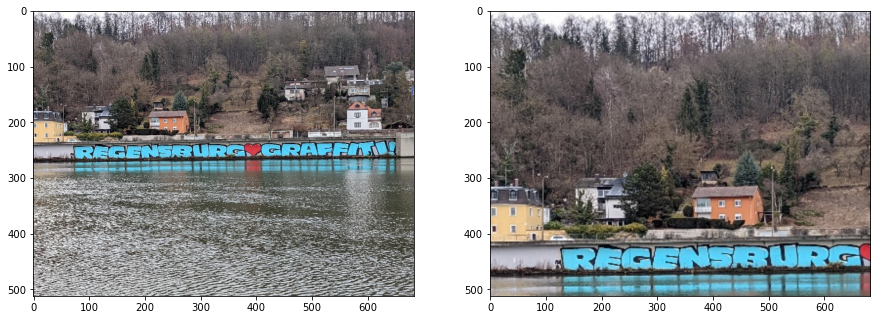

In [7]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)

Any affine transform can be written in form of matrix multiplication. Given the transform matrix, OpenCV offers a direct way to apply the transform.

(<matplotlib.axes._subplots.AxesSubplot at 0x24edbba9610>,
 <matplotlib.image.AxesImage at 0x24edc2cdca0>)

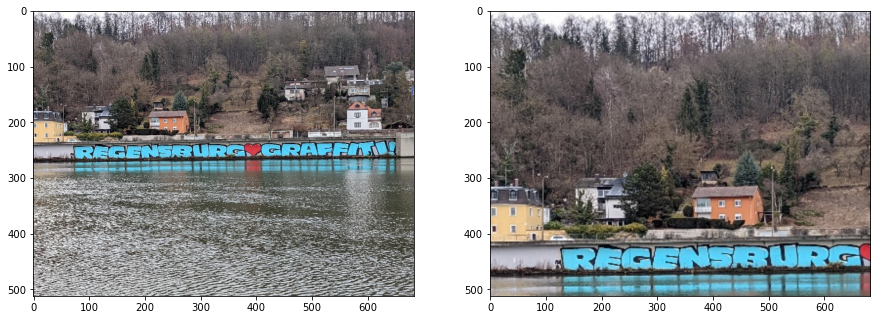

In [8]:
Z = np.array([[zoom, 0, 0], [0, zoom, 0]])
out = cv2.warpAffine(img, Z, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

(<matplotlib.axes._subplots.AxesSubplot at 0x24edbcd9d90>,
 <matplotlib.image.AxesImage at 0x24edc5742b0>)

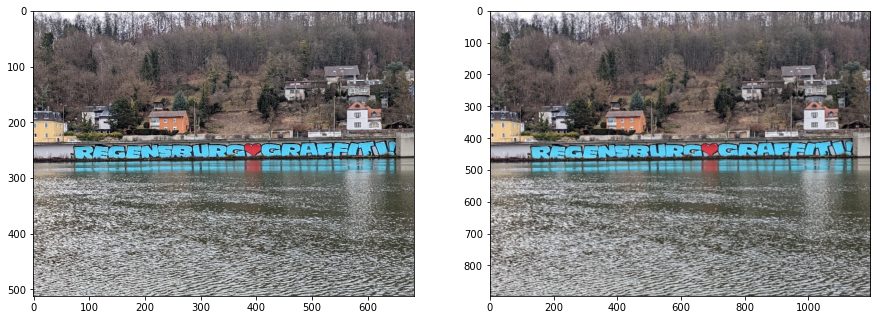

In [9]:
out = cv2.warpAffine(img, Z, (int(zoom*cols), int(zoom*rows)))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

Image rotation is also an affine transform.

(<matplotlib.axes._subplots.AxesSubplot at 0x24edc519340>,
 <matplotlib.image.AxesImage at 0x24edcac5eb0>)

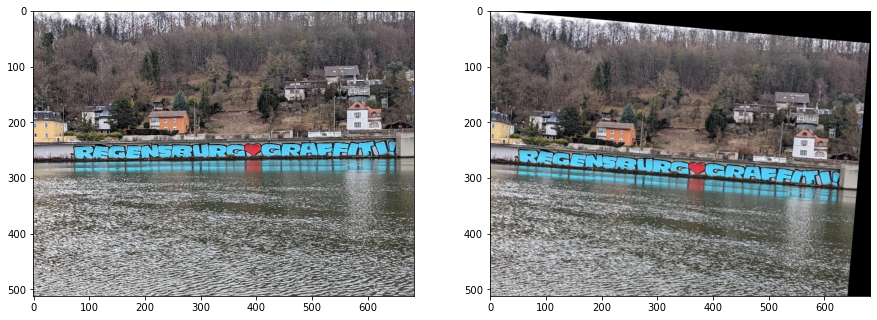

In [10]:
theta = np.deg2rad(5)
R = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0]])

out = cv2.warpAffine(img, R, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

To account for the rotation not being center, we can build the rotation matrix with a built-in OpenCV function.

[[  0.70710678   0.70710678 -81.14274837]
 [ -0.70710678   0.70710678 316.1040764 ]] 512 683 256 341


(<matplotlib.axes._subplots.AxesSubplot at 0x24ed7c3fee0>,
 <matplotlib.image.AxesImage at 0x24edc719be0>)

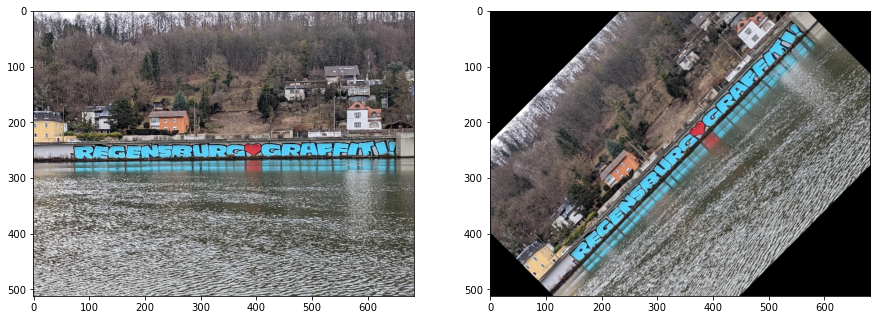

In [11]:
center = (cols//2, rows//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

print(rotate_matrix, rows, cols, rows//2, cols//2)

out = cv2.warpAffine(img, rotate_matrix, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)